# Maryam Amiri's Report for Echocardiogram Dataset

### Import Libraries

In [386]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import datetime
import math

import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,plot_confusion_matrix

### Import train and test datasets

In [289]:
df_train=pd.read_excel("C:\\Users\\maryam\\Downloads\\my train dataset.xlsx")
df_test=pd.read_excel("C:\\Users\\maryam\\Downloads\\my test dataset.xlsx")

### Remove features name and group from train and test datasets

In [290]:
df_train=df_train.drop(['name','group'], axis=1)
df_test=df_test.drop(['name','group'], axis=1)

### Replace ? with NaN value

In [291]:
df_train=df_train.replace('?',np.NaN)
df_test['age_at_heart_attack']=df_test['age_at_heart_attack'].replace('?',np.NaN)

### Finding the number of missing values

In [292]:
df_train.isna().sum()

survival                  0
still_alive               0
age_at_heart_attack       2
pericardial_effusion      0
fractional_shortening     7
epss                     14
lvdd                     10
wall_motion_score         3
wall_motion_index         1
mult                      3
aliveat1                 37
dtype: int64

,Total,Percent
aliveat1,37,0.336364
epss,14,0.127273
lvdd,10,0.090909
fractional_shortening,7,0.063636
mult,3,0.027273
wall_motion_score,3,0.027273
age_at_heart_attack,2,0.018182
wall_motion_index,1,0.009091
pericardial_effusion,0,0.000000
still_alive,0,0.000000


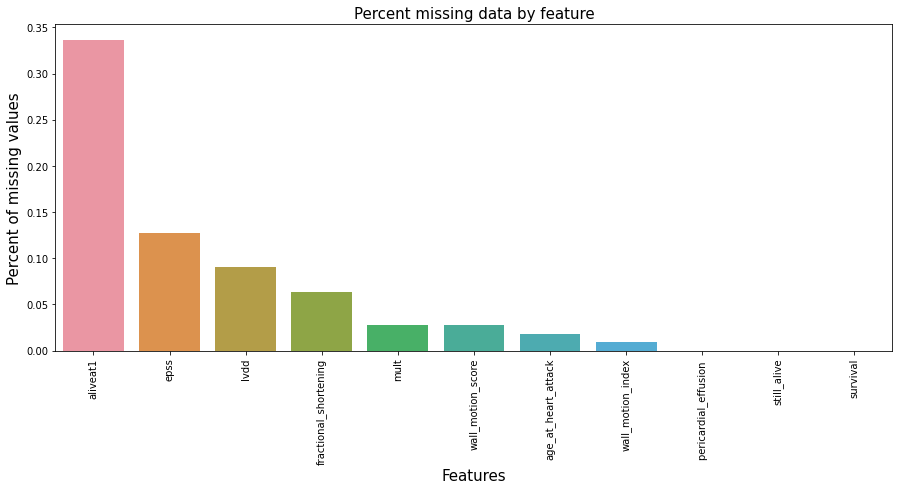

In [293]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head(11)

In [294]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 11 columns):
survival                 110 non-null float64
still_alive              110 non-null int64
age_at_heart_attack      108 non-null float64
pericardial_effusion     110 non-null int64
fractional_shortening    103 non-null float64
epss                     96 non-null float64
lvdd                     100 non-null float64
wall_motion_score        107 non-null float64
wall_motion_index        109 non-null float64
mult                     107 non-null float64
aliveat1                 73 non-null float64
dtypes: float64(9), int64(2)
memory usage: 9.5 KB


In [295]:
df_train[df_train.duplicated()]

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epss,lvdd,wall_motion_score,wall_motion_index,mult,aliveat1


In [296]:
columns=[
 'age_at_heart_attack',
 'pericardial_effusion ',
 'fractional_shortening',
 'epss',
 'lvdd',
 'wall_motion_score',
 'wall_motion_index',
 'mult']

In [297]:
X=df_train[columns]

In [298]:
X_test=df_test[columns]

In [299]:
y=df_train['aliveat1']

### Split train dataset to train and validation data

In [301]:
X_train,X_val,y_train,y_val=train_test_split(X, y,test_size=.20, random_state=42)

### Imputing features with missing values in train dataset using most frequent 

In [302]:
imp1 = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

In [304]:
X_train['age_at_heart_attack']=imp1.fit_transform(X_train['age_at_heart_attack'].values.reshape(-1,1))
X_val['age_at_heart_attack']=imp1.transform(X_val['age_at_heart_attack'].values.reshape(-1,1))
X_test['age_at_heart_attack']=imp1.transform(X_test['age_at_heart_attack'].values.reshape(-1,1))




X_train['fractional_shortening']=imp1.fit_transform(X_train['fractional_shortening'].values.reshape(-1,1))
X_val['fractional_shortening']=imp1.transform(X_val['fractional_shortening'].values.reshape(-1,1))
X_test['fractional_shortening']=imp1.transform(X_test['fractional_shortening'].values.reshape(-1,1))



X_train['lvdd']=imp1.fit_transform(X_train['lvdd'].values.reshape(-1,1))
X_val['lvdd']=imp1.transform(X_val['lvdd'].values.reshape(-1,1))
X_test['lvdd']=imp1.transform(X_test['lvdd'].values.reshape(-1,1))

In [305]:
X_train['wall_motion_index']=imp1.fit_transform(X_train['wall_motion_index'].values.reshape(-1,1))
X_val['wall_motion_index']=imp1.transform(X_val['wall_motion_index'].values.reshape(-1,1))
X_test['wall_motion_index']=imp1.transform(X_test['wall_motion_index'].values.reshape(-1,1))


X_train['wall_motion_score']=imp1.fit_transform(X_train['wall_motion_score'].values.reshape(-1,1))
X_val['wall_motion_score']=imp1.transform(X_val['wall_motion_score'].values.reshape(-1,1))
X_test['wall_motion_score']=imp1.transform(X_test['wall_motion_score'].values.reshape(-1,1))

X_train['mult']=imp1.fit_transform(X_train['mult'].values.reshape(-1,1))
X_val['mult']=imp1.transform(X_val['mult'].values.reshape(-1,1))
X_test['mult']=imp1.transform(X_test['mult'].values.reshape(-1,1))


X_train['epss']=imp1.fit_transform(X_train['epss'].values.reshape(-1,1))
X_val['epss']=imp1.transform(X_val['epss'].values.reshape(-1,1))
X_test['epss']=imp1.transform(X_test['epss'].values.reshape(-1,1))

In [306]:
X_train=pd.DataFrame(X_train,columns=[
 'age_at_heart_attack',
 'pericardial_effusion ',
 'fractional_shortening',
 'epss',
 'lvdd',
 'wall_motion_score',
 'wall_motion_index',
 'mult'])

In [307]:
X_val=pd.DataFrame(X_val,columns=[
 'age_at_heart_attack',
 'pericardial_effusion ',
 'fractional_shortening',
 'epss',
 'lvdd',
 'wall_motion_score',
 'wall_motion_index',
 'mult'])

In [308]:
X_test=pd.DataFrame(X_test,columns=[
 'age_at_heart_attack',
 'pericardial_effusion ',
 'fractional_shortening',
 'epss',
 'lvdd',
 'wall_motion_score',
 'wall_motion_index',
 'mult'])

In [309]:
df_Train=pd.concat([X_train,y_train],axis=1)

### Drop missing values in train dataset

In [310]:
df_Train=df_Train.dropna()

In [311]:
X_train=df_Train[columns]
y_train=df_Train['aliveat1']

In [312]:
df_Val=pd.concat([X_val,y_val],axis=1)

### Drop missing values in validation dataset

In [313]:
df_Val=df_Val.dropna()

In [314]:
X_val=df_Val[columns]
y_val=df_Val['aliveat1']

# Visualization

In [315]:
df_train['aliveat1'].value_counts()

0.0    50
1.0    23
Name: aliveat1, dtype: int64

In [316]:
Dead = df_train[df_train['aliveat1']==0]
aliveat1at1= df_train[df_train['aliveat1']==1]

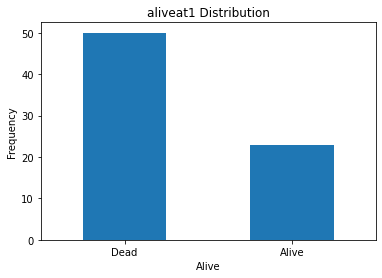

In [317]:
LABELS = ["Dead","Alive"]

count_classes = pd.value_counts(df_train['aliveat1'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("aliveat1 Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Alive")
plt.ylabel("Frequency");

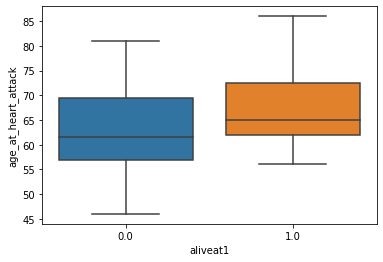

In [318]:
sns.boxplot(df_train['aliveat1'],df_train['age_at_heart_attack'])

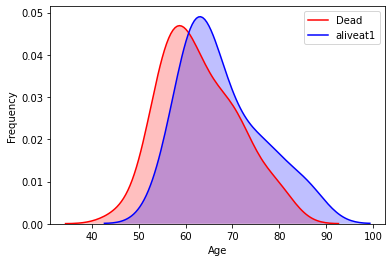

In [319]:
g = sns.kdeplot(df_train['age_at_heart_attack'][(df_train['aliveat1'] == 0) ], color="Red",shade=True)
g = sns.kdeplot(df_train['age_at_heart_attack'][(df_train['aliveat1'] == 1) ], color="Blue",shade=True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Dead","aliveat1"])

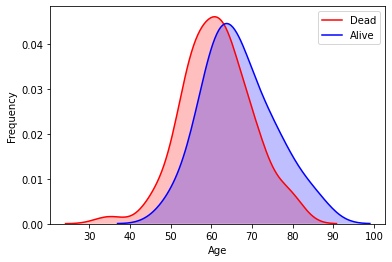

In [320]:
g = sns.kdeplot(df_train['age_at_heart_attack'][(df_train['still_alive'] == 0) ], color="Red",shade=True)
g = sns.kdeplot(df_train['age_at_heart_attack'][(df_train['still_alive'] == 1) ], color="Blue",shade=True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Dead","Alive"])

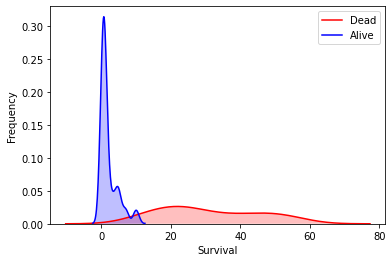

In [321]:
g = sns.kdeplot(df_train['survival'][(df_train['aliveat1'] == 0) ], color="Red",shade=True)
g = sns.kdeplot(df_train['survival'][(df_train['aliveat1'] == 1) ], color="Blue",shade=True)
g.set_xlabel("Survival")
g.set_ylabel("Frequency")
g = g.legend(["Dead","Alive"])

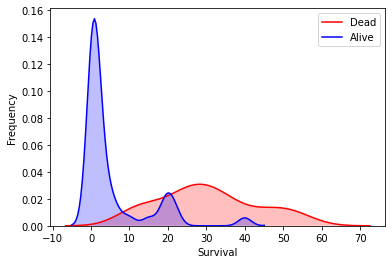

In [322]:
g = sns.kdeplot(df_train['survival'][(df_train['still_alive'] == 0) ], color="Red",shade=True)
g = sns.kdeplot(df_train['survival'][(df_train['still_alive'] == 1) ], color="Blue",shade=True)
g.set_xlabel("Survival")
g.set_ylabel("Frequency")
g = g.legend(["Dead","Alive"])

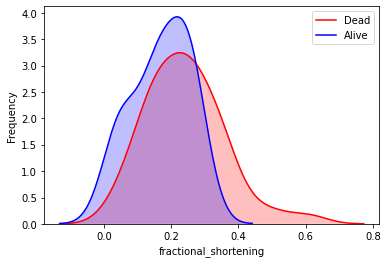

In [323]:
g = sns.kdeplot(df_train['fractional_shortening'][(df_train['aliveat1'] == 0) ], color="Red",shade=True)
g = sns.kdeplot(df_train['fractional_shortening'][(df_train['aliveat1'] == 1) ], color="Blue",shade=True)
g.set_xlabel("fractional_shortening")
g.set_ylabel("Frequency")
g = g.legend(["Dead","Alive"])

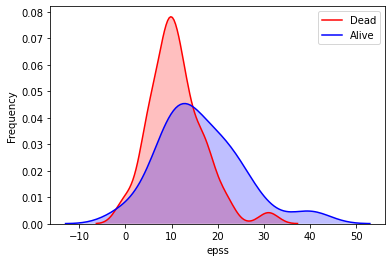

In [324]:
g = sns.kdeplot(df_train['epss'][(df_train['aliveat1'] == 0) ], color="Red",shade=True)
g = sns.kdeplot(df_train['epss'][(df_train['aliveat1'] == 1) ], color="Blue",shade=True)
g.set_xlabel("epss")
g.set_ylabel("Frequency")
g = g.legend(["Dead","Alive"])

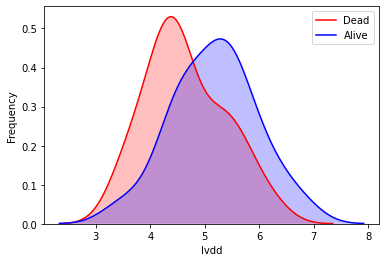

In [325]:
g = sns.kdeplot(df_train['lvdd'][(df_train['aliveat1'] == 0) ], color="Red",shade=True)
g = sns.kdeplot(df_train['lvdd'][(df_train['aliveat1'] == 1) ], color="Blue",shade=True)
g.set_xlabel("lvdd")
g.set_ylabel("Frequency")
g = g.legend(["Dead","Alive"])

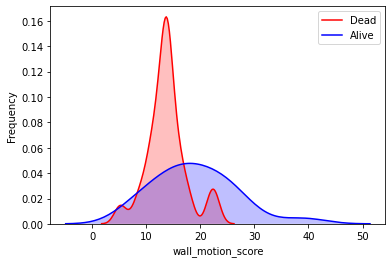

In [326]:
g = sns.kdeplot(df_train['wall_motion_score'][(df_train['aliveat1'] == 0) ], color="Red",shade=True)
g = sns.kdeplot(df_train['wall_motion_score'][(df_train['aliveat1'] == 1) ], color="Blue",shade=True)
g.set_xlabel("wall_motion_score")
g.set_ylabel("Frequency")
g = g.legend(["Dead","Alive"])

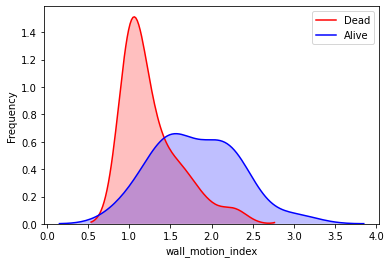

In [327]:
g = sns.kdeplot(df_train['wall_motion_index'][(df_train['aliveat1'] == 0) ], color="Red",shade=True)
g = sns.kdeplot(df_train['wall_motion_index'][(df_train['aliveat1'] == 1) ], color="Blue",shade=True)
g.set_xlabel("wall_motion_index")
g.set_ylabel("Frequency")
g = g.legend(["Dead","Alive"])

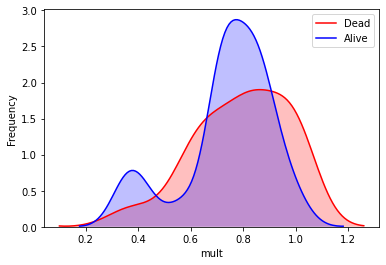

In [328]:
g = sns.kdeplot(df_train['mult'][(df_train['aliveat1'] == 0) ], color="Red",shade=True)
g = sns.kdeplot(df_train['mult'][(df_train['aliveat1'] == 1) ], color="Blue",shade=True)
g.set_xlabel("mult")
g.set_ylabel("Frequency")
g = g.legend(["Dead","Alive"])

# Modeling

## Random Forest

In [387]:
random_params = {"criterion": ["gini", "entropy"],
                 "n_estimators":[200,300],
                 "max_depth": list(range(2,5,1)),
                 "class_weight":["balanced","balanced_subsample",None],
                 "max_leaf_nodes":list(range(2,5))}
              
grid_Random = GridSearchCV(RandomForestClassifier(n_jobs=-1),random_params,scoring='f1')

grid_Random.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              rand

In [389]:
grid_Random.best_score_

0.7318181818181817

In [390]:
Random_clf = grid_Random.best_estimator_


In [391]:
Random_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=3, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [392]:
y_predict_r=Random_clf.predict(X_val)

In [393]:
y_predict_r

array([1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.])

## Model Evaluation

In [394]:
print(classification_report(y_val, y_predict_r))

              precision    recall  f1-score   support

         0.0       1.00      0.69      0.82        13
         1.0       0.33      1.00      0.50         2

    accuracy                           0.73        15
   macro avg       0.67      0.85      0.66        15
weighted avg       0.91      0.73      0.78        15



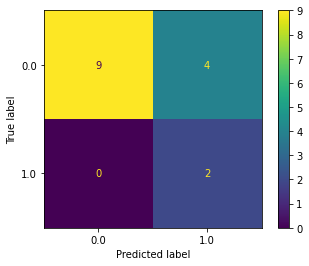

In [395]:
plot_confusion_matrix(Random_clf,X_val,y_val)

### The result of Random Forest on the test dataset

In [339]:
predict_rf_test=Random_clf.predict(X_test)
predict_rf_test

array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0.])

### Scaling the X_train, X_val and X_test using StandardScaler

In [341]:
scalar=StandardScaler()
scalar.fit(X_train)
X_train_scale=scalar.transform(X_train)
X_val_scale=scalar.transform(X_val)
X_test_scale=scalar.transform(X_test)

## Logestic Regression

In [377]:
random_params = {"C":list(np.linspace(0.01,1,30)), 
              "class_weight":["balanced",None,{0:0.54,1:0.46}]}
              
grid_lgr = GridSearchCV(LogisticRegression(max_iter=200),random_params,scoring='f1')

grid_lgr.fit(X_train_scale, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=200, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.04413793103448...
                               0.5903448275862069, 0.6244827586206897,
                               0.6586206896551725, 0.6927586206896552,
                               0.7268965517241379, 0.7610344827586207,
                               0.7951724137931035, 0.8293103448275863,
        

In [378]:
grid_lgr.best_score_

0.7565800865800866

In [379]:
lgr_clf = grid_lgr.best_estimator_

In [380]:
lgr_clf

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [381]:
y_predict_l=lgr_clf.predict(X_val_scale)

In [382]:
y_predict_l

array([1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.])

## Model Evaluation

In [383]:
print(classification_report(y_val, y_predict_l))

              precision    recall  f1-score   support

         0.0       1.00      0.62      0.76        13
         1.0       0.29      1.00      0.44         2

    accuracy                           0.67        15
   macro avg       0.64      0.81      0.60        15
weighted avg       0.90      0.67      0.72        15



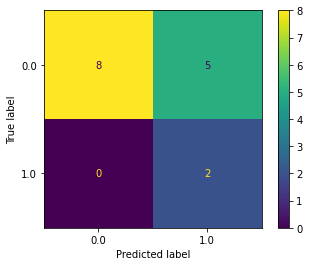

In [384]:
plot_confusion_matrix(lgr_clf,X_val_scale,y_val)

### The result of Logistic Regression on test dataset

In [385]:
predict_lgr_test=lgr_clf.predict(X_test_scale)
predict_lgr_test

array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0.])